# **Model Multiple Linear Regresi**

**1. Membaca data file CSV**

In [1]:
# Menghubungkan Collab dengan Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Memanggil data set lewat Google Drive
path = "/content/drive/MyDrive/Project_Machine_Learning/Praktikum_Mandiri_3/"

In [3]:
# Membaca file csv menggunakan pandas
import pandas as pd

df = pd.read_csv(path + "Data/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# Mencari informasi umum pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**2. Menghitung statistik deskriptif pada kolom numeric**

In [5]:
# Menghitung statistik deskriptif pada kolom numeric dengan describe
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**3. Data pre-processing**

In [6]:
# Menghapus kolom yang tidak sesuai
df = df.drop(columns=['instant', 'dteday', 'casual', 'registered'], errors='ignore')

print("\n===== Kolom Setelah Dihapus =====")
print(df.columns)


===== Kolom Setelah Dihapus =====
Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


**4. Analisis korelasi**

In [7]:
# Hitung matriks korelasi
corr_matrix = df.corr()

# Cetak matriks korelasi
print(corr_matrix)

              season        yr      mnth   holiday   weekday  workingday  \
season      1.000000 -0.001844  0.831440 -0.010537 -0.003080    0.012485   
yr         -0.001844  1.000000 -0.001792  0.007954 -0.005461   -0.002013   
mnth        0.831440 -0.001792  1.000000  0.019191  0.009509   -0.005901   
holiday    -0.010537  0.007954  0.019191  1.000000 -0.101960   -0.253023   
weekday    -0.003080 -0.005461  0.009509 -0.101960  1.000000    0.035790   
workingday  0.012485 -0.002013 -0.005901 -0.253023  0.035790    1.000000   
weathersit  0.019211 -0.048727  0.043528 -0.034627  0.031087    0.061200   
temp        0.334315  0.047604  0.220205 -0.028556 -0.000170    0.052660   
atemp       0.342876  0.046106  0.227459 -0.032507 -0.007537    0.052182   
hum         0.205445 -0.110651  0.222204 -0.015937 -0.052232    0.024327   
windspeed  -0.229046 -0.011817 -0.207502  0.006292  0.014282   -0.018796   
cnt         0.406100  0.566710  0.279977 -0.068348  0.067443    0.061156   

           

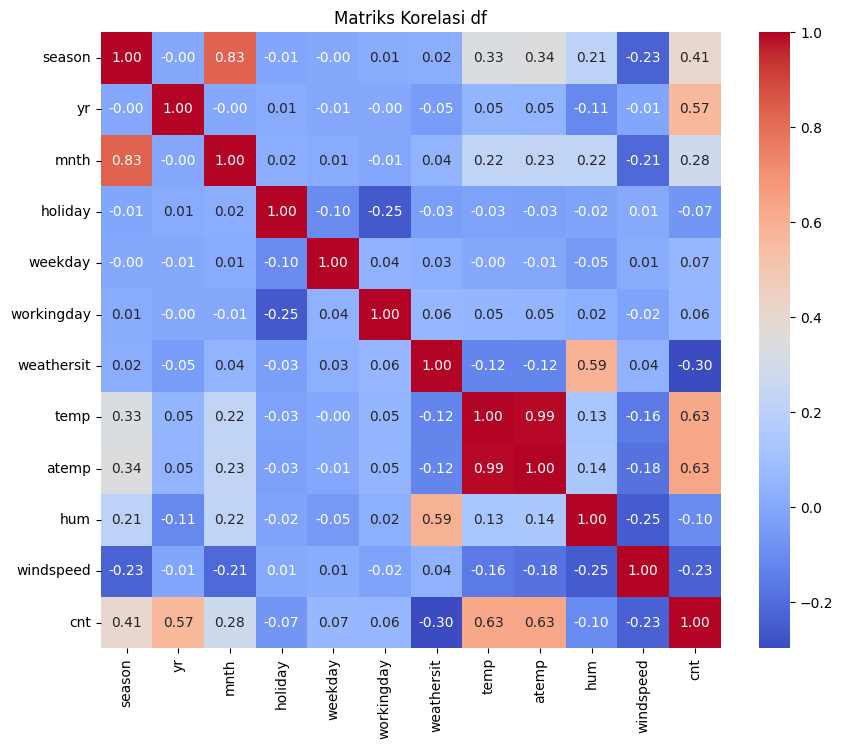

In [8]:
# Buat heatmap grafik

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi df")
plt.show()

**5. Membagi dataset untuk training dan testing**

In [9]:
from sklearn.model_selection import train_test_split

#Misalkan target (Y) adalah cnt, # Variabel dependen
Y = df['cnt']
#Fitur (X) adalah semua kolom kecuali cnt, # Variabel independen
X = df.drop(columns=['cnt'])

print("\n===== Variabel Independen =====")
print(X.columns)

#Bagi data 80% training dan 20% testing
X_training, X_testing, y_training, y_testing = train_test_split(X, Y, test_size=0.2, random_state=42)

##Cetak Pembagian Data
print("\nJumlah data train", len(X_training))
print("Jumlah data test", len(X_testing))
print("Jumlah data train", len(y_training))
print("Jumlah data test\n", len(y_testing))
##cek apakah sudah ada constanta pada data training
X_training.head()


===== Variabel Independen =====
Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

Jumlah data train 584
Jumlah data test 147
Jumlah data train 584
Jumlah data test
 147


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
682,4,1,11,0,2,1,2,0.343333,0.323225,0.662917,0.342046
250,3,0,9,0,4,1,3,0.633913,0.555361,0.939565,0.192748
336,4,0,12,0,6,0,1,0.299167,0.310604,0.612917,0.095783
260,3,0,9,0,0,0,1,0.507500,0.490537,0.695000,0.178483
543,3,1,6,0,3,1,1,0.697500,0.640792,0.360000,0.271775


**6. Pemodelan**

In [10]:
import statsmodels.api as sm

# Tambahkan konstanta
X_train_const = sm.add_constant(X_training)
X_train_const.head()

,const,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
682,1.0,4,1,11,0,2,1,2,0.343333,0.323225,0.662917,0.342046
250,1.0,3,0,9,0,4,1,3,0.633913,0.555361,0.939565,0.192748
336,1.0,4,0,12,0,6,0,1,0.299167,0.310604,0.612917,0.095783
260,1.0,3,0,9,0,0,0,1,0.507500,0.490537,0.695000,0.178483
543,1.0,3,1,6,0,3,1,1,0.697500,0.640792,0.360000,0.271775


In [11]:
# Buat model OLS (Ordinary Least Squares)
model = sm.OLS(y_training, X_train_const).fit()

print("===== Koefisien Model =====")
print(model.params)
print("--------------------------------")
# Beberapa koefisien dari model
const = model.params['const']
x1_temp = model.params['temp']
x2_hum = model.params['hum']
x3_windspeed = model.params['windspeed']

# Cetak persamaan regresi
print(f"y = {const:.3f} + ({x1_temp:.3f})*temp + ({x2_hum:.3f})*hum + ({x3_windspeed:.3f})*windspeed")

===== Koefisien Model =====
const         1248.320928
season         524.722536
yr            2023.997547
mnth           -38.444658
holiday       -391.550766
weekday         72.937003
workingday     160.804892
weathersit    -632.856284
temp          2097.247836
atemp         3488.042179
hum           -865.439419
windspeed    -2080.540395
dtype: float64
--------------------------------
y = 1248.321 + (2097.248)*temp + (-865.439)*hum + (-2080.540)*windspeed


In [12]:
# Tampilkan ringkasan hasil
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     196.9
Date:                Sun, 12 Oct 2025   Prob (F-statistic):          2.56e-186
Time:                        07:37:37   Log-Likelihood:                -4784.9
No. Observations:                 584   AIC:                             9594.
Df Residuals:                     572   BIC:                             9646.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1248.3209    272.690      4.578      0.0

In [13]:
# Model training
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_training, y_training)

LinearRegression()

**7. Evaluasi model**

In [14]:
from sklearn.metrics import r2_score, mean_squared_error

y_train_pred = model.predict(X_training)
r2_train = r2_score(y_training, y_train_pred)
mse_train = mean_squared_error(y_training, y_train_pred)

print("\n===== Evaluasi Data Training =====")
print(f"R² Score: {r2_train:.4f}")
print(f"Mean Squared Error: {mse_train:.4f}")


===== Evaluasi Data Training =====
R² Score: 0.7911
Mean Squared Error: 765819.3608


**8. Pengujian model dengan data testing**

In [15]:
import numpy as np
# Tambahkan konstanta ke data uji
# X_test_const = sm.add_constant(X_testing) # Removed this line
# Prediksi jumlah penyewaan sepeda (cnt)
y_pred_test = model.predict(X_testing)
# Buat tabel hasil prediksi
hasil = pd.DataFrame({
    "cnt Aktual": y_testing.to_numpy(),
    "cnt Prediksi": y_pred_test
})
# 1) Selisih error (positif berarti overpredict)
hasil["Selisih Error"] = hasil["cnt Prediksi"] - hasil["cnt Aktual"]
# 2) Akurasi per-baris (100 × (1 - |error|/aktual)), dibatasi 0–100
denom = hasil["cnt Aktual"].replace(0, np.nan)  # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih Error"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil

,cnt Aktual,cnt Prediksi,Selisih Error,Akurasi (%)
0,6606,6220.416612,-385.583388,94.163134
1,1550,1571.605763,21.605763,98.606080
2,3747,3043.967028,-703.032972,81.237444
3,6041,4307.202484,-1733.797516,71.299495
4,7538,6765.659072,-772.340928,89.754034
...,...,...,...,...
142,2132,2315.142869,183.142869,91.409809
143,4258,5570.824250,1312.824250,69.168054
144,2792,4168.334568,1376.334568,50.704349
145,5180,4420.697509,-759.302491,85.341651
